In [1]:
## 导库并读入数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

project_path = './'
user_track_data = pd.read_csv('Train_Test_Splits/Context/train.csv')
user_track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257012 entries, 0 to 257011
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           257012 non-null  int64  
 1   track_id          257012 non-null  object 
 2   hashtag           257012 non-null  object 
 3   created_at        257012 non-null  object 
 4   score             257012 non-null  float64
 5   lang              257012 non-null  object 
 6   tweet_lang        257012 non-null  object 
 7   time_zone         235202 non-null  object 
 8   instrumentalness  257004 non-null  float64
 9   liveness          257004 non-null  float64
 10  speechiness       257003 non-null  float64
 11  danceability      257003 non-null  float64
 12  valence           257002 non-null  float64
 13  loudness          257012 non-null  float64
 14  tempo             257012 non-null  float64
 15  acousticness      257004 non-null  float64
 16  energy            25

In [2]:
user_track_data.isnull().sum()

user_id                 0
track_id                0
hashtag                 0
created_at              0
score                   0
lang                    0
tweet_lang              0
time_zone           21810
instrumentalness        8
liveness                8
speechiness             9
danceability            9
valence                10
loudness                0
tempo                   0
acousticness            8
energy                  8
mode                    8
key                     8
rating                  0
dtype: int64

In [3]:
# 去缺失值太多的特征和上下文特征（时间、地点、语言等）以及rating，先做基于音乐特征的聚类
user_track_data.drop(['time_zone'], inplace=True, axis=1)
user_track_data.drop(['lang'], inplace=True, axis=1)
user_track_data.drop(['tweet_lang'], inplace=True, axis=1)
user_track_data.drop(['created_at'], inplace=True, axis=1)
user_track_data.drop(['rating'], inplace=True, axis=1)

In [4]:
# 对于其他音乐特征的缺失，因为数量较少，我们可以取平均值填充
user_track_data['instrumentalness'].fillna(value=user_track_data['instrumentalness'].mean(), inplace=True)
user_track_data['liveness'].fillna(value=user_track_data['liveness'].mean(), inplace=True)
user_track_data['speechiness'].fillna(value=user_track_data['speechiness'].mean(), inplace=True)
user_track_data['danceability'].fillna(value=user_track_data['danceability'].mean(), inplace=True)
user_track_data['valence'].fillna(value=user_track_data['valence'].mean(), inplace=True)
user_track_data['acousticness'].fillna(value=user_track_data['acousticness'].mean(), inplace=True)
user_track_data['energy'].fillna(value=user_track_data['energy'].mean(), inplace=True)
user_track_data['mode'].fillna(value=user_track_data['mode'].mean(), inplace=True)
user_track_data['key'].fillna(value=user_track_data['key'].mean(), inplace=True)
user_track_data.isnull().sum()
# 缺失值处理完毕

user_id             0
track_id            0
hashtag             0
score               0
instrumentalness    0
liveness            0
speechiness         0
danceability        0
valence             0
loudness            0
tempo               0
acousticness        0
energy              0
mode                0
key                 0
dtype: int64

In [5]:
user_track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257012 entries, 0 to 257011
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           257012 non-null  int64  
 1   track_id          257012 non-null  object 
 2   hashtag           257012 non-null  object 
 3   score             257012 non-null  float64
 4   instrumentalness  257012 non-null  float64
 5   liveness          257012 non-null  float64
 6   speechiness       257012 non-null  float64
 7   danceability      257012 non-null  float64
 8   valence           257012 non-null  float64
 9   loudness          257012 non-null  float64
 10  tempo             257012 non-null  float64
 11  acousticness      257012 non-null  float64
 12  energy            257012 non-null  float64
 13  mode              257012 non-null  float64
 14  key               257012 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 29.4+ MB


### 按歌曲特征聚类

In [6]:
# 对重复歌曲去重
user_track_data.drop_duplicates(inplace=True, subset=['track_id'])

In [7]:
user_track_data

,user_id,track_id,hashtag,score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key
0,823214346,b129f3e0a0bdc1e61c57ce994f9d2932,kiss92,0.800000,0.000000,0.0764,0.0240,0.549,0.320,-7.698,80.133,0.341000,0.408,1.0,8.0
1,823214346,64b30f6ac1acecb7cef9dc890e1c3ea7,kiss92,0.800000,0.018300,0.1090,0.0407,0.585,0.380,-6.440,127.955,0.000357,0.759,1.0,9.0
2,823214346,cc1a46ee0446538ecf6b65db01c30cd8,kiss92,0.800000,0.000000,0.0931,0.0345,0.489,0.270,-4.197,92.526,0.077000,0.846,1.0,4.0
3,823214346,dbbd8525c1bc48cc791bfe618b74bac6,kiss92,0.800000,0.000000,0.0909,0.0314,0.607,0.576,-4.217,122.010,0.032700,0.934,1.0,3.0
4,823214346,dbdbb866939c1ab1dfd0d5cfac740eaa,kiss92,0.800000,0.000005,0.0951,0.1730,0.507,0.768,-5.581,99.252,0.081800,0.923,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256997,24046179,b4987c0f36f2d35b94deb5aed9d91596,salutemeorshootme,0.341667,0.000350,0.1560,0.2100,0.857,0.535,-3.021,94.544,0.039000,0.911,1.0,8.0
257001,192441363,0441cc3fc25379efdb060a65d812a4f6,thanks,0.771875,0.000000,0.1880,0.0691,0.587,0.617,-3.822,84.777,0.238000,0.747,1.0,9.0
257002,2830404192,e24b9ccd4b9cbfd115964f65ed945542,garagerock,0.700000,0.000011,0.0716,0.0911,0.590,0.650,-3.505,121.544,0.002420,0.891,0.0,5.0
257009,393147908,cd4658a9df4f8a9d73a1eab496edda25,bless,0.781250,0.320000,0.1020,0.0716,0.286,0.409,-6.673,170.588,0.164000,0.794,1.0,1.0


In [8]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

C:\Users\youmeng\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from keras.utils import to_categorical
# 将对象类特征映射到数值
lb = LabelEncoder()
user_track_data['hashtag'] = lb.fit_transform(user_track_data['hashtag'])
user_track_data = pd.get_dummies(user_track_data, columns=['hashtag'])
user_track_data

,user_id,track_id,score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,...,hashtag_1988,hashtag_1989,hashtag_1990,hashtag_1991,hashtag_1992,hashtag_1993,hashtag_1994,hashtag_1995,hashtag_1996,hashtag_1997
0,823214346,b129f3e0a0bdc1e61c57ce994f9d2932,0.800000,0.000000,0.0764,0.0240,0.549,0.320,-7.698,80.133,...,0,0,0,0,0,0,0,0,0,0
1,823214346,64b30f6ac1acecb7cef9dc890e1c3ea7,0.800000,0.018300,0.1090,0.0407,0.585,0.380,-6.440,127.955,...,0,0,0,0,0,0,0,0,0,0
2,823214346,cc1a46ee0446538ecf6b65db01c30cd8,0.800000,0.000000,0.0931,0.0345,0.489,0.270,-4.197,92.526,...,0,0,0,0,0,0,0,0,0,0
3,823214346,dbbd8525c1bc48cc791bfe618b74bac6,0.800000,0.000000,0.0909,0.0314,0.607,0.576,-4.217,122.010,...,0,0,0,0,0,0,0,0,0,0
4,823214346,dbdbb866939c1ab1dfd0d5cfac740eaa,0.800000,0.000005,0.0951,0.1730,0.507,0.768,-5.581,99.252,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256997,24046179,b4987c0f36f2d35b94deb5aed9d91596,0.341667,0.000350,0.1560,0.2100,0.857,0.535,-3.021,94.544,...,0,0,0,0,0,0,0,0,0,0
257001,192441363,0441cc3fc25379efdb060a65d812a4f6,0.771875,0.000000,0.1880,0.0691,0.587,0.617,-3.822,84.777,...,0,0,0,0,0,0,0,0,0,0
257002,2830404192,e24b9ccd4b9cbfd115964f65ed945542,0.700000,0.000011,0.0716,0.0911,0.590,0.650,-3.505,121.544,...,0,0,0,0,0,0,0,0,0,0
257009,393147908,cd4658a9df4f8a9d73a1eab496edda25,0.781250,0.320000,0.1020,0.0716,0.286,0.409,-6.673,170.588,...,0,0,0,0,0,0,0,0,0,0


In [10]:
user_track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22092 entries, 0 to 257011
Columns: 2012 entries, user_id to hashtag_1997
dtypes: float64(12), int64(1), object(1), uint8(1998)
memory usage: 44.6+ MB


In [11]:
# 归一化
col_features = ['score', 'instrumentalness', 'liveness', 'danceability', 'valence', 
                'loudness', 'energy', 'tempo', 'acousticness']
X = MinMaxScaler().fit_transform(user_track_data[col_features])

# 按照以上几个特征（律动、音量、能量），将音乐聚为5类
kmeans = KMeans(init='k-means++', n_clusters=5, random_state=15).fit(X)
user_track_data['kmeans'] = kmeans.labels_

In [12]:
user_track_data

,user_id,track_id,score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,...,hashtag_1989,hashtag_1990,hashtag_1991,hashtag_1992,hashtag_1993,hashtag_1994,hashtag_1995,hashtag_1996,hashtag_1997,kmeans
0,823214346,b129f3e0a0bdc1e61c57ce994f9d2932,0.800000,0.000000,0.0764,0.0240,0.549,0.320,-7.698,80.133,...,0,0,0,0,0,0,0,0,0,3
1,823214346,64b30f6ac1acecb7cef9dc890e1c3ea7,0.800000,0.018300,0.1090,0.0407,0.585,0.380,-6.440,127.955,...,0,0,0,0,0,0,0,0,0,2
2,823214346,cc1a46ee0446538ecf6b65db01c30cd8,0.800000,0.000000,0.0931,0.0345,0.489,0.270,-4.197,92.526,...,0,0,0,0,0,0,0,0,0,2
3,823214346,dbbd8525c1bc48cc791bfe618b74bac6,0.800000,0.000000,0.0909,0.0314,0.607,0.576,-4.217,122.010,...,0,0,0,0,0,0,0,0,0,2
4,823214346,dbdbb866939c1ab1dfd0d5cfac740eaa,0.800000,0.000005,0.0951,0.1730,0.507,0.768,-5.581,99.252,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256997,24046179,b4987c0f36f2d35b94deb5aed9d91596,0.341667,0.000350,0.1560,0.2100,0.857,0.535,-3.021,94.544,...,0,0,0,0,0,0,0,0,0,0
257001,192441363,0441cc3fc25379efdb060a65d812a4f6,0.771875,0.000000,0.1880,0.0691,0.587,0.617,-3.822,84.777,...,0,0,0,0,0,0,0,0,0,1
257002,2830404192,e24b9ccd4b9cbfd115964f65ed945542,0.700000,0.000011,0.0716,0.0911,0.590,0.650,-3.505,121.544,...,0,0,0,0,0,0,0,0,0,1
257009,393147908,cd4658a9df4f8a9d73a1eab496edda25,0.781250,0.320000,0.1020,0.0716,0.286,0.409,-6.673,170.588,...,0,0,0,0,0,0,0,0,0,2


In [13]:
cluster = user_track_data.groupby(by=user_track_data['kmeans'])
cluster.count()

,user_id,track_id,score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,...,hashtag_1988,hashtag_1989,hashtag_1990,hashtag_1991,hashtag_1992,hashtag_1993,hashtag_1994,hashtag_1995,hashtag_1996,hashtag_1997
kmeans,,,,,,,,,,,,,,,,,,,,,
0,4005,4005,4005,4005,4005,4005,4005,4005,4005,4005,...,4005,4005,4005,4005,4005,4005,4005,4005,4005,4005
1,6593,6593,6593,6593,6593,6593,6593,6593,6593,6593,...,6593,6593,6593,6593,6593,6593,6593,6593,6593,6593
2,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452,...,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452
3,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,...,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940
4,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,...,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102


In [14]:
user_track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22092 entries, 0 to 257011
Columns: 2013 entries, user_id to kmeans
dtypes: float64(12), int32(1), int64(1), object(1), uint8(1998)
memory usage: 44.7+ MB


In [15]:
y = user_track_data['kmeans']
x = user_track_data.drop(['track_id', 'user_id', 'kmeans'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=15)

In [17]:
x_train

,score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,...,hashtag_1988,hashtag_1989,hashtag_1990,hashtag_1991,hashtag_1992,hashtag_1993,hashtag_1994,hashtag_1995,hashtag_1996,hashtag_1997
225452,0.300000,0.118000,0.1130,0.0588,0.476,0.941,-8.941,159.667,0.034000,0.811,...,0,0,0,0,0,0,0,0,0,0
115968,0.675000,0.000000,0.0675,0.0290,0.731,0.396,-7.114,95.995,0.064400,0.574,...,0,0,0,0,0,0,0,0,0,0
243360,0.700000,0.000274,0.3370,0.1470,0.697,0.602,-6.242,81.562,0.081300,0.602,...,0,0,0,0,0,0,0,0,0,0
112466,0.675000,0.160000,0.3230,0.0615,0.544,0.606,-7.672,128.889,0.001470,0.980,...,0,0,0,0,0,0,0,0,0,0
111352,0.675000,0.019400,0.0656,0.0446,0.865,0.963,-5.701,124.027,0.045000,0.875,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239811,0.300000,0.634000,0.0995,0.0292,0.645,0.490,-5.336,130.018,0.008780,0.803,...,0,0,0,0,0,0,0,0,0,0
98957,0.700000,0.115000,0.0507,0.0687,0.327,0.179,-6.321,138.907,0.000131,0.877,...,0,0,0,0,0,0,0,0,0,0
185806,0.754167,0.000075,0.2040,0.2270,0.932,0.556,-13.168,116.351,0.036200,0.540,...,0,0,0,0,0,0,0,0,0,0
252260,0.000000,0.005190,0.4870,0.0286,0.328,0.287,-12.033,94.567,0.021800,0.497,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
model = lgbm.fit(x_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 15464, number of used features: 63
[LightGBM] [Info] Start training from score -1.688043
[LightGBM] [Info] Start training from score -1.196072
[LightGBM] [Info] Start training from score -1.432888
[LightGBM] [Info] Start training from score -2.010000
[LightGBM] [Info] Start training from score -1.965171


In [19]:
model.score(x_test, y_test)

0.9779722389861195

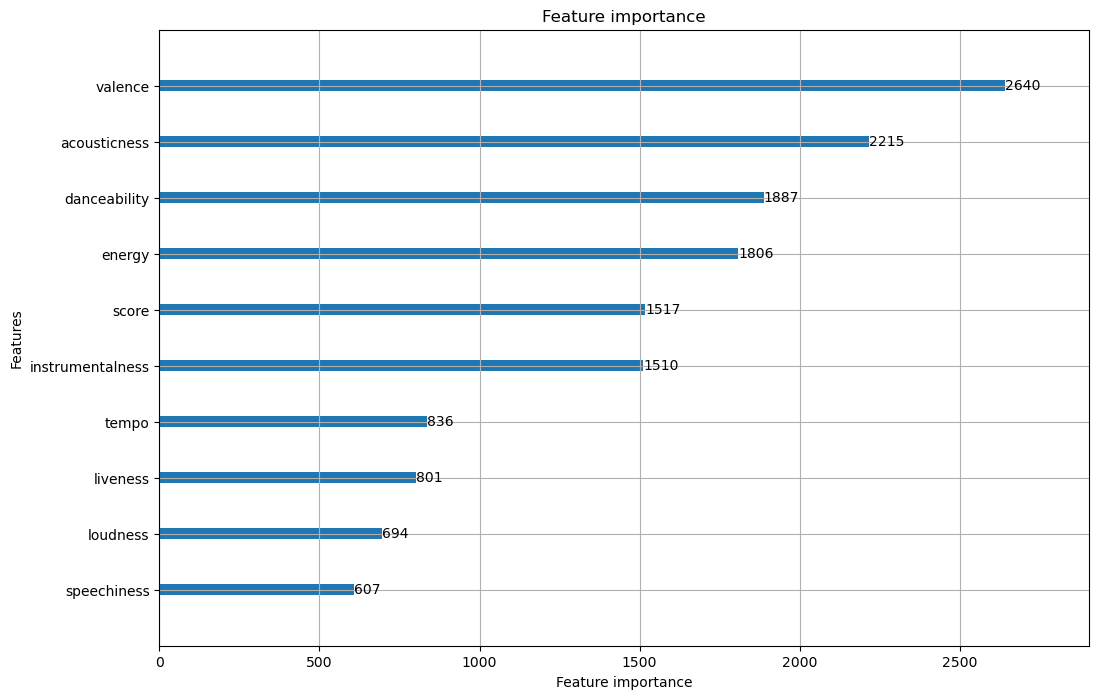

In [20]:
import lightgbm

ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(12, 8))
plt.show()

In [21]:
from keras.preprocessing.image import img_to_array
import imutils
from keras.models import load_model
import cv2

In [22]:
# 加载Haar特征的级联分类器，用于面部检测
detection_model_path = project_path +  'haarcascade_files/haarcascade_frontalface_default.xml'
emotion_model_path = 'emotion_recognition_model.h5'
face_detection = cv2.CascadeClassifier(detection_model_path) # 人脸检测模型

# 加载情绪识别模型
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ['anger','disgust', 'happiness', 'sadness', 'neutral']

In [23]:
from keras.preprocessing import image
def emotion_testing():
    # 打开摄像头
    cap=cv2.VideoCapture(0)
    
    # 定义一个变量来控制是否显示当前帧
    show_frame = True

    predicted_emotion = None
    while True:
        
        # 捕捉照片
        if show_frame:
        # 从摄像头读取一帧
            ret,test_img=cap.read()
            if not ret:
                continue
        else:
            break
        
        # 照片转化为RGB灰度图
        gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

        # 检测
        faces_detected = face_detection.detectMultiScale(gray_img, 1.32, 5)

        
        for (x,y,w,h) in faces_detected:
            # 裁剪人脸并调整格式
            cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=3)
            roi_gray=gray_img[y:y+w,x:x+h]
            
            # 转化为48 x 48的灰度图并转化为像素点
            roi_gray=cv2.resize(roi_gray,(48,48))
            img_pixels = image.img_to_array(roi_gray)
            
            # 提升维度，将值的范围控制到0~1
            img_pixels = np.expand_dims(img_pixels, axis = 0)
            img_pixels /= 255

            # 预测情绪
            predictions = emotion_classifier.predict(img_pixels)
            
            # 找到概率最大值的索引
            max_index = np.argmax(predictions[0])
            predicted_emotion = EMOTIONS[max_index]
            cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            resized_img = cv2.resize(test_img, (1000, 700))
            cv2.imshow('Facial emotion analysis ',resized_img)
            
        # 等待键盘输入
        key = cv2.waitKey(1) & 0xFF
        if key == ord(' '):  # 如果按下空格键，则切换show_frame的值
            show_frame = not show_frame
        elif key == ord('q'):  # 如果按下'q'键，则退出循环
            break

    cap.release()
    cv2.destroyAllWindows()
    return predicted_emotion

In [24]:
# 找到对应的情绪
emotion_word = emotion_testing()
print(f'Emotion detected is {emotion_word}')
i = 0
for i in range(len(EMOTIONS)):
    if emotion_word == EMOTIONS[i]:
        break
emotion_code = i

1/1 [==============================] - 0s 32ms/step
Emotion detected is sadness


In [25]:
def get_results(emotion_code):
    RECOMMEND_NUM = 10
    return user_track_data[user_track_data['kmeans'] == emotion_code]['track_id'].head(RECOMMEND_NUM)

In [26]:
recs = get_results(emotion_code)
print(recs)

0     b129f3e0a0bdc1e61c57ce994f9d2932
5     156523fa722ca14df9053e17cd7c2641
9     3cd075c88ab66df36b2d85c2a51021db
19    3e5bcdda3baad80e1b5fa83816b2bc48
22    ada4ce3a8af96ac0257452dd1e4bbe9d
26    b4d043fbb7b17364bb26cc2060e60a8f
32    9e7fdbf2045c9f814f6c0bed5da9bed7
34    6001a0280abe86af28039926310c414d
35    d19a7cf63b7d391da39eba3a6e8aee04
47    7a9d10a1da6e15edf04fb319c8a8864b
Name: track_id, dtype: object
